In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from census import Census
import sys

from config import (api_key)
c = Census(api_key, year=2013)

In [3]:
city_spend = pd.read_csv('city_budgets.csv', encoding = 'latin-1')

In [4]:
city_spend['city_state'] = city_spend['City'] + ', ' + city_spend['State']
city_spend.head()

,City,State,City_Budget,Population,Spend_Per_Citizen,State_Budget,Population.1,Spend_Per_Citizen.1,City_Pct_of_State,Higher,city_state
0,Albuquerque,NM,893000000,556495,1605,1.620000e+10,2086895.0,7763.0,0.2067,State,"Albuquerque, NM"
1,Anaheim,CA,1600000000,345012,4638,2.213000e+11,38431393.0,5758.0,0.8054,State,"Anaheim, CA"
2,Anchorage,AK,471000000,300950,1565,1.160000e+10,737259.0,15734.0,0.0995,State,"Anchorage, AK"
3,Arlington,TX,490000000,379577,1291,1.000000e+11,26505637.0,3773.0,0.3422,State,"Arlington, TX"
4,Atlanta,GA,533000000,447841,1190,4.140000e+10,9994759.0,4142.0,0.2873,State,"Atlanta, GA"


In [5]:
cities_df = pd.read_csv('cities_df.csv')
cities_df.head()

,Unnamed: 0,CBSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,Principal City Name,FIPS State Code,FIPS Place Code,STUSAB,State Name,STATENS,city_state,city_full_state,Miserable City,Happy City
0,0,10100,"Aberdeen, SD",Micropolitan Statistical Area,Aberdeen,46.0,100.0,SD,South Dakota,1785534,"Aberdeen, SD","Aberdeen, South Dakota",False,False
1,1,15100,"Brookings, SD",Micropolitan Statistical Area,Brookings,46.0,7580.0,SD,South Dakota,1785534,"Brookings, SD","Brookings, South Dakota",False,False
2,2,26700,"Huron, SD",Micropolitan Statistical Area,Huron,46.0,31060.0,SD,South Dakota,1785534,"Huron, SD","Huron, South Dakota",False,False
3,3,33580,"Mitchell, SD",Micropolitan Statistical Area,Mitchell,46.0,43100.0,SD,South Dakota,1785534,"Mitchell, SD","Mitchell, South Dakota",False,False
4,4,38180,"Pierre, SD",Micropolitan Statistical Area,Pierre,46.0,49600.0,SD,South Dakota,1785534,"Pierre, SD","Pierre, South Dakota",False,False


In [6]:
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'place:*'}, )

In [7]:
census_pd = pd.DataFrame(census_data)
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State", "place": "FIPS Place Code"})
census_pd.head()

,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Unemployment Count,Name,FIPS Place Code,State
0,NaN,23.0,11.0,NaN,NaN,0.0,"Abanda CDP, Alabama",00100,01
1,43.7,2684.0,544.0,26500.0,17391.0,170.0,"Abbeville city, Alabama",00124,01
2,38.0,4496.0,1081.0,45488.0,22838.0,314.0,"Adamsville city, Alabama",00460,01
3,42.3,1036.0,322.0,37917.0,17409.0,90.0,"Addison town, Alabama",00484,01
4,50.1,384.0,120.0,23036.0,12575.0,13.0,"Akron town, Alabama",00676,01


In [8]:
city_spend_merge = pd.merge(city_spend, cities_df, how='left', on='city_state')

In [9]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
city_spend_merge['State_Budget'].astype(str).astype(float)

0     16200000000
1    221300000000
2     11600000000
3    100000000000
4     41400000000
5     30300000000
6    100000000000
7    221300000000
8     37300000000
9     28800000000
10    23900000000
11     7300000000
12    56900000000
13   134000000000
14    28900000000
15    43800000000
16    44700000000
17    70400000000
18   221300000000
19    59100000000
20    59100000000
21    30300000000
22    59100000000
23   100000000000
24   100000000000
25    30300000000
26    51200000000
27    43800000000
28   100000000000
29    27300000000
         ...     
70    73600000000
71    86200000000
72    28900000000
73    86200000000
74   100000000000
75    28300000000
76    43800000000
77     8730000000
78   221300000000
79   221300000000
80   100000000000
81   221300000000
82   221300000000
83   221300000000
84   221300000000
85   221300000000
86    28900000000
87    34300000000
88    23200000000
89    35400000000
90    73600000000
91   221300000000
92    73600000000
93    59100000000
94    2890

In [10]:
city_spend_merge

,City,State,City_Budget,Population,Spend_Per_Citizen,State_Budget,Population.1,Spend_Per_Citizen.1,City_Pct_of_State,Higher,...,Metropolitan/Micropolitan Statistical Area,Principal City Name,FIPS State Code,FIPS Place Code,STUSAB,State Name,STATENS,city_full_state,Miserable City,Happy City
0,Albuquerque,NM,893000000,556495,1605,16200000000,2086895,7763,0,State,...,Metropolitan Statistical Area,Albuquerque,35,2000,NM,New Mexico,897535,"Albuquerque, New Mexico",False,False
1,Anaheim,CA,1600000000,345012,4638,221300000000,38431393,5758,1,State,...,Metropolitan Statistical Area,Anaheim,6,2000,CA,California,1779778,"Anaheim, California",False,False
2,Anchorage,AK,471000000,300950,1565,11600000000,737259,15734,0,State,...,Metropolitan Statistical Area,Anchorage,2,3000,AK,Alaska,1785533,"Anchorage, Alaska",False,True
3,Arlington,TX,490000000,379577,1291,100000000000,26505637,3773,0,State,...,Metropolitan Statistical Area,Arlington,48,4000,TX,Texas,1779801,"Arlington, Texas",False,False
4,Atlanta,GA,533000000,447841,1190,41400000000,9994759,4142,0,State,...,Metropolitan Statistical Area,Atlanta,13,4000,GA,Georgia,1705317,"Atlanta, Georgia",False,False
5,Aurora,CO,591000000,345803,1710,30300000000,5272086,5747,0,State,...,Metropolitan Statistical Area,Aurora,8,4000,CO,Colorado,1779779,"Aurora, Colorado",False,False
6,Austin,TX,3500000000,885400,3953,100000000000,26505637,3773,1,City,...,Metropolitan Statistical Area,Austin,48,5000,TX,Texas,1779801,"Austin, Texas",False,True
7,Bakersfield,CA,418000000,363630,1150,221300000000,38431393,5758,0,State,...,Metropolitan Statistical Area,Bakersfield,6,3526,CA,California,1779778,"Bakersfield, California",False,False
8,Baltimore,MD,1648000000,622104,2649,37300000000,5938737,6281,0,State,...,Metropolitan Statistical Area,Baltimore,24,4000,MD,Maryland,1714934,"Baltimore, Maryland",False,False
9,Baton Rouge,LA,819000000,229426,3570,28800000000,4629284,6221,1,State,...,Metropolitan Statistical Area,Baton Rouge,22,5000,LA,Louisiana,1629543,"Baton Rouge, Louisiana",False,False


Text(0.5,1,'Government Expenditures per Citizen')

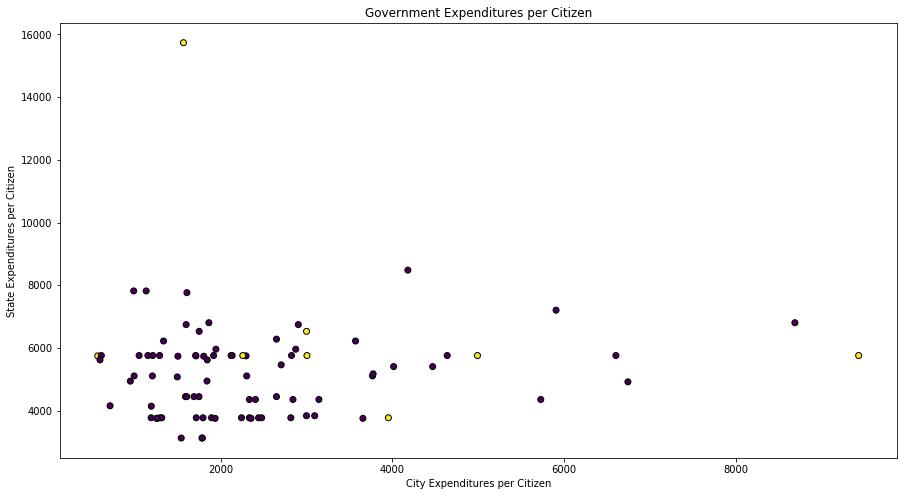

In [11]:
plt.figure(figsize=(15,8))
plt.scatter(city_spend_merge['Spend_Per_Citizen'], city_spend_merge['Spend_Per_Citizen.1'], c=city_spend_merge['Happy City'], linewidth=1, edgecolors='black')

plt.xlabel('City Expenditures per Citizen')
plt.ylabel('State Expenditures per Citizen')
plt.title('Government Expenditures per Citizen')

In [12]:
avg_happy_spend = city_spend_merge.groupby(['Happy City'])['Spend_Per_Citizen'].mean()
avg_happy_spend_df = avg_happy_spend.to_frame()
avg_happy_spend_df

,Spend_Per_Citizen
Happy City,
False,2371
True,3596


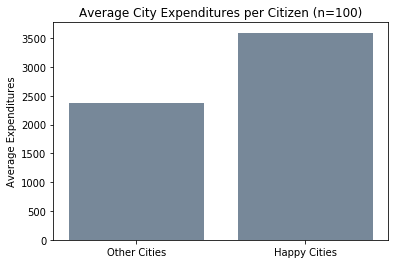

In [17]:
x_axis = ['Other Cities', 'Happy Cities']
plt.bar(x_axis, avg_happy_spend_df['Spend_Per_Citizen'], color='lightslategrey')

plt.title("Average City Expenditures per Citizen (n=100)")
plt.ylabel("Average Expenditures")
plt.savefig('city_spending.png')

In [14]:
avg_state_spend = city_spend_merge.groupby(['Happy City'])['Spend_Per_Citizen.1'].mean()
avg_state_spend_df = avg_state_spend.to_frame()
avg_state_spend_df

,Spend_Per_Citizen.1
Happy City,
False,5103
True,6852


Text(0,0.5,'Average Expenditures')

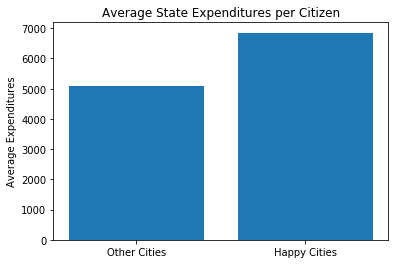

In [15]:
x_axis = ['Other Cities', 'Happy Cities']
plt.bar(x_axis, avg_state_spend_df['Spend_Per_Citizen.1'])

plt.title("Average State Expenditures per Citizen")
plt.ylabel("Average Expenditures")